In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Examine grain growth in HATP 7b clouds

In [2]:
import astropy.units as u
from maplib import read_file, load_out3

In [3]:
from matplotlib import gridspec

In [4]:
import ipywidgets as widgets
from ipywidgets import interact

In [5]:
lons = np.arange(-180., 180.01, 15) # deg
lats = [45.0]

In [6]:
night_dust = load_out3('dust', lons[0], lats[0])
day_dust = load_out3('dust', lons[12], lats[0])

### Where are the clouds?

In [7]:
ZLIM = (8000., 0.0)
PLIM = (3, -6)
def plot_clouds(ax, lon, lat, key, ylim=ZLIM, **kwargs):
    dust = load_out3('dust', lon, lat)
    z = dust['z'] * u.cm
    ax.plot(dust[key], z.to(u.km).value, **kwargs)
    ax.set_ylabel('Distance from top (km)')
    ax.set_ylim(ylim)
    return

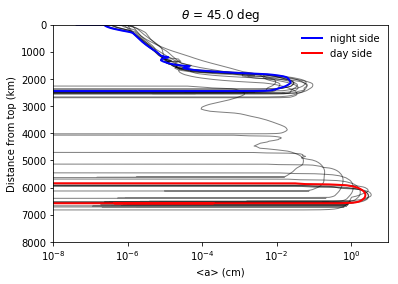

In [8]:
ALIM = (1.e-8, 10.0)
ax = plt.subplot(111)

for i in range(len(lons)):
    plot_clouds(ax, lons[i], lats[0], '<a>', lw=1, color='k', alpha=0.5, label='')

plot_clouds(ax, lons[0], lats[0], '<a>', lw=2, color='b', label='night side')
plot_clouds(ax, lons[12], lats[0], '<a>', lw=2, color='r', label='day side')

ax.set_xlim(ALIM)
ax.set_xscale('log')
ax.set_xlabel('<a> (cm)')
ax.set_title(r'$\theta$ = {:.1f} deg'.format(lats[0]))
ax.legend(loc='upper right', frameon=False)

plt.savefig("vertical_grain_sizes_Theta45.0.pdf", format='pdf')

### What are the clouds doing? (Drifting, evaporating, growing?)

Text(0.5, 1.0, '$\\theta$ = 45.0 deg')

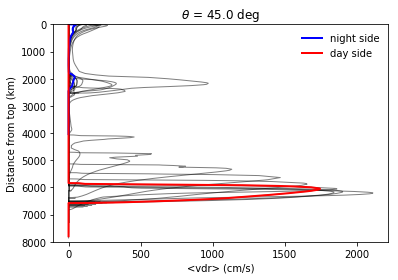

In [9]:
ax = plt.subplot(111)
for i in range(len(lons)):
    plot_clouds(ax, lons[i], lats[0], '<vdr>', 
                lw=1, color='k', alpha=0.5, label='')
plot_clouds(ax, lons[0], lats[0], '<vdr>',
            lw=2, color='b', label='night side')
plot_clouds(ax, lons[12], lats[0], '<vdr>',
            lw=2, color='r', label='day side')

ax.set_xlabel('<vdr> (cm/s)')
ax.legend(loc='upper right', frameon=False)
ax.set_title(r'$\theta$ = {:.1f} deg'.format(lats[0]))

Text(0.5, 1.0, '$\\theta$ = 45.0 deg')

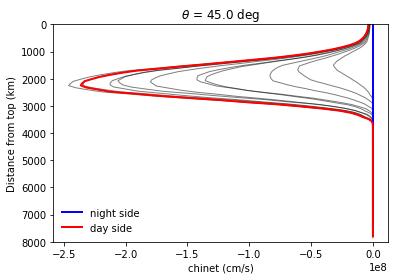

In [10]:
ax = plt.subplot(111)
for i in range(len(lons)):
    plot_clouds(ax, lons[i], lats[0], 'chinet', 
                lw=1, color='k', alpha=0.5, label='')
plot_clouds(ax, lons[0], lats[0], 'chinet',
            lw=2, color='b', label='night side')
plot_clouds(ax, lons[12], lats[0], 'chinet',
            lw=2, color='r', label='day side')

ax.set_xlabel('chinet (cm/s)')
ax.legend(loc='lower left', frameon=False)
ax.set_title(r'$\theta$ = {:.1f} deg'.format(lats[0]))

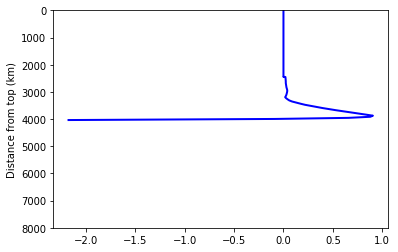

In [11]:
ax = plt.subplot(111)
plot_clouds(ax, lons[0], lats[0], 'chinet',
            lw=2, color='b', label='night side')

In [12]:
from astropy.table import Table
from maplib import read_file

In [13]:
test = Table.read('static_weather_results/HATP_7b_Phi0.0Theta45.0/out3_dist.dat', format='ascii', 
                 header_start=2, data_start=3)

In [14]:
test.colnames

['p', 'pel', 'T', 'N', 'a1', 'sigma', 'sol-Nr.']

In [15]:
test2 = read_file('static_weather_results/HATP_7b_Phi0.0Theta45.0/out3_dist.dat', skip_lines=2)

In [16]:
test.keys()

['p', 'pel', 'T', 'N', 'a1', 'sigma', 'sol-Nr.']

In [17]:
len(test['N']), len(test['p'])

(514, 514)

In [18]:
test2['N']

array(['N', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E+00', '0.000000E+00', '0.000000E+00', '0.000000E+00',
       '0.000000E

In [19]:
VLIM = (0.1, 3.e4)
RHOLIM = (1.e-10, 1.e-7)
NLIM = (1.0, 1.e3)
def plot_drift(ax, lon, lat, vs_p=False):
    dust = load_out3('dust', lon, lat)
    z = dust['z'] * u.cm
    p = dust['p'] * u.dyne / u.cm**2
        
    if vs_p:
        y = np.log10(p.to(u.bar).value)
        ylabel = 'log P (bar)'
        ylim = PLIM
    else:
        y = z.to(u.km).value
        ylabel = 'Distance from top (km)'
        ylim = ZLIM
    
    #thermo = load_out3('thermo', lon, lat)
    #ax.plot(dust['rhod/rho'] * thermo['rho'], y, 
    #        lw=2, color='k', label='')
    
    dist = load_out3('dist', lon, lat)
    # IDK why but the first element is always the column name. Skip that one.
    ax.plot(dist['N'][1:], y, lw=2, ls='--', color='k', label='')
        
    dat2 = load_out3('imp', lon, lat)
    ax2 = ax.twiny()
    vdr = dust['<vdr>']
    #vdr = dat2['drift']
    ax2.set_xlabel(r'<$v_{\rm dr}$> (cm/s)', color='g', size=14)
    #vdr = dat2['vdr[m/s]']
    ax2.plot(vdr, y, color='g')
    ax2.set_xlim(VLIM)
    #ax2.set_xlim(0, 100)
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(r'$n_d$ (cm$^{-3}$)')
    ax.set_xscale('log')
    ax2.set_xscale('log')
    ax.set_xlim(NLIM)
    ax.set_ylim(ylim)
    ax2.tick_params('x', colors='g')
    return

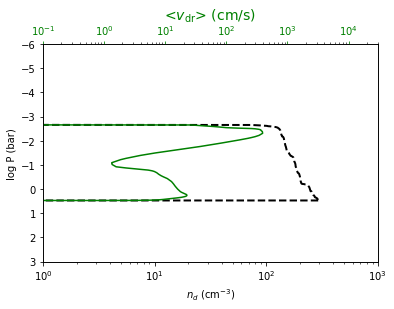

In [20]:
ax = plt.subplot(111)
plot_drift(ax, lons[6], lats[0], vs_p=True)

In [21]:
CHILIM = (-11.3, 11.3)

def plot_growth(ax, lon, lat, vs_p=False):
    dust = load_out3('dust', lon, lat)
    z = dust['z'] * u.cm
    p = dust['p'] * u.dyne / u.cm**2
    
    if vs_p:
        y = np.log10(p.to(u.bar).value)
        ylabel = 'log P (bar)'
        ylim = PLIM
    else:
        y = z.to(u.km).value
        ylabel = 'Distance from top (km)'
        ylim = ZLIM
    
    ax.plot(dust['<a>'], y, lw=2, color='k', label='')
        
    chinet = dust['chinet']
    ax2 = ax.twiny()
    # plot growth
    ig = chinet >= 0.0
    ax2.plot(np.log10(chinet[ig]), y[ig], 
            lw=2, color='b', ls='', marker='o', alpha=0.5)
    # plot destruction
    ide = chinet < 0.0
    ax2.plot(np.log10(np.abs(chinet[ide])), y[ide], 
            lw=2, ls='', color='r', marker='o', alpha=0.5)
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Grain size (cm)')
    ax.set_xscale('log')
    ax.set_xlim(ALIM)
    ax.set_ylim(ylim)
    ax2.set_xlabel(r'log $\chi_{net}$ (cm/s)', color='b')
    ax2.set_xlim(CHILIM)
    #ax2.tick_params('x', colors='b')
    return

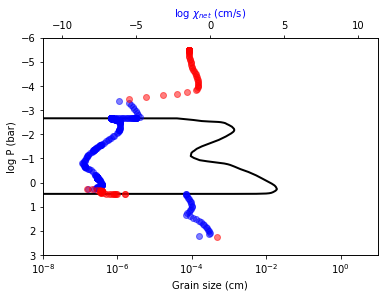

In [22]:
ax = plt.subplot(111)
plot_growth(ax, lons[6], lats[0], vs_p=True)

In [23]:
test = load_out3('nuclea', -180, 45)

In [24]:
test.keys()

dict_keys(['z', 'p', 'S_TiO2[s]', 'S_Mg2SiO4[s]', 'S_SiO[s]', 'S_SiO2[s]', 'S_Fe[s]', 'S_Al2O3[s]', 'S_CaTiO3[s]', 'S_FeO[s]', 'S_FeS[s]', 'S_Fe2O3[s]', 'S_MgO[s]', 'S_MgSiO3[s]', 'S_CaSiO3[s]', 'S_Fe2SiO4[s]', 'S_C[s]', 'N*_TiO2', 'J*_TiO2', 'N*_C', 'J*_C', 'N*_SiO', 'J*_SiO'])

In [25]:
for k in test.keys():
    ss = k.split('S_')
    if len(ss) > 1:
        print(k)
        print(np.mean(test[k]))

S_TiO2[s]
1.3168241338384653e+24
S_Mg2SiO4[s]
1.654204959893145e+28
S_SiO[s]
1599366777.689682
S_SiO2[s]
1.233313280605789e+18
S_Fe[s]
572220886482543.8
S_Al2O3[s]
1.207998161384327e+24
S_CaTiO3[s]
1.6659211889529396e+29
S_FeO[s]
567009843270.6959
S_FeS[s]
186612425170773.72
S_Fe2O3[s]
3708112790.4008718
S_MgO[s]
3.1563329236643076e+16
S_MgSiO3[s]
6.651227262755179e+28
S_CaSiO3[s]
1.1793931297756697e+29
S_Fe2SiO4[s]
9.990918303012977e+22
S_C[s]
298.6676373300888


In [26]:
NUCLIM = (-50, 6)
ATMLIM = (1.e-10, 0.1)

def plot_nuclea(ax, lon, lat, vs_p=False):
    
    gas  = load_out3('thermo', lon, lat)
    z = gas['z'] * u.cm
    p = gas['p'] * u.dyne / u.cm**2

    nuclea = load_out3('nuclea', lon, lat)

    if vs_p:
        y = np.log10(p.to(u.bar).value)
        ylabel = 'log P (bar)'
        ylim = PLIM
    else:
        y = z.to(u.km).value
        ylabel = 'Distance from top (km)'
        ylim = ZLIM
    
    for nuc in ['TiO2', 'C', 'SiO', 'Fe', 'Mg2SiO4']:
        ax.plot(nuclea['S_{}[s]'.format(nuc)], y, 
                lw=2, alpha=0.8, label='S_{}'.format(nuc))

    #for k in nuclea.keys():
    #    ss = k.split('S_')
    #    if len(ss) > 1:
    #        nuc = ss[1].rstrip('[s]')
    #        if np.any(nuclea['S_{}[s]'.format(nuc)] > 1.0):
    #            ax.plot(nuclea['S_{}[s]'.format(nuc)], y, 
    #                    lw=2, alpha=0.8, label='S_{}'.format(nuc))
    
    plt.legend(loc='lower right', ncol=2, frameon=False)
    
    ax2 = ax.twiny()
    for nuc in ['TiO2', 'C', 'SiO']:
        jstar  = nuclea['J*_' + nuc]
        # plot growth
        ig = np.log10(jstar) > -90
        ax2.plot(np.log10(jstar[ig]), y[ig], 
                 lw=2, ls='', marker='o', alpha=0.5, label=nuc)
        #print(np.any(jstar < 0))
        if np.all(np.log10(jstar) < -90):
            print("No {} nucleation".format(nuc))
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel('S')
    ax.set_xscale('log')
    ax.set_xlim(0.8, 300)
    ax.set_ylim(ylim)
    ax2.set_xlabel(r'log J* (cm$^{-3}$ s$^{-1}$)')
    #plt.legend(loc='lower right', frameon=False)
    ax2.set_xlim(NUCLIM)
    #ax2.tick_params('x', colors='b')
    return

No C nucleation
No SiO nucleation


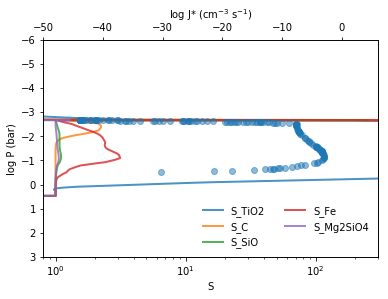

In [27]:
ax = plt.subplot(111)
plot_nuclea(ax, lons[6], lats[0], vs_p=True)

In [28]:
def plot_growth_widget(i):
    vs_p = True
    fig = plt.figure(figsize=(18,4))
    gs  = gridspec.GridSpec(1, 3)
    
    ax0 = plt.subplot(gs[0])
    plot_growth(ax0, lons[i], lats[0], vs_p=vs_p)
    
    ax1 = plt.subplot(gs[1])
    plot_drift(ax1, lons[i], lats[0], vs_p=vs_p)
    
    ax2 = plt.subplot(gs[2])
    plot_nuclea(ax2, lons[i], lats[0], vs_p=vs_p)
    #ax2.legend(loc='lower right', frameon=False)
    
    print('Phi = {:.1f} Theta = {:.1f}'.format(lons[i], lats[0]))
    return

In [29]:
w = widgets.IntSlider(12, min=0, max=len(lons)-1, continuous_update=False)
interact(plot_growth_widget, i=w)

interactive(children=(IntSlider(value=12, continuous_update=False, description='i', max=24), Output()), _dom_c…

<function __main__.plot_growth_widget(i)>

In [30]:
for i in [0, 6, 12]:
    plot_growth_widget(i)
    plt.savefig('Grain_Growth/HATP_7b_Phi{:.1f}Theta{:.1f}.pdf'.format(lons[i], lats[0]), 
                format='pdf')
    plt.clf()

No C nucleation
Phi = -180.0 Theta = 45.0
No C nucleation
No SiO nucleation
Phi = -90.0 Theta = 45.0
No C nucleation
No SiO nucleation
Phi = 0.0 Theta = 45.0


<Figure size 1296x288 with 0 Axes>

<Figure size 1296x288 with 0 Axes>

<Figure size 1296x288 with 0 Axes>